# **AutoRegressive Model**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **AR(1)**


# Yt = C + coefficient * Yt-1 + error

<ipython-input-2-4508db49bfae>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ar1_sample[0] =3 + np.random.normal(loc=0, scale=2.5, size=1)
<ipython-input-2-4508db49bfae>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ar1_sample[t] = 3 + (0.7 * ar1_sample[t-1]) + np.random.normal(loc=0, scale=2.5, size=1)


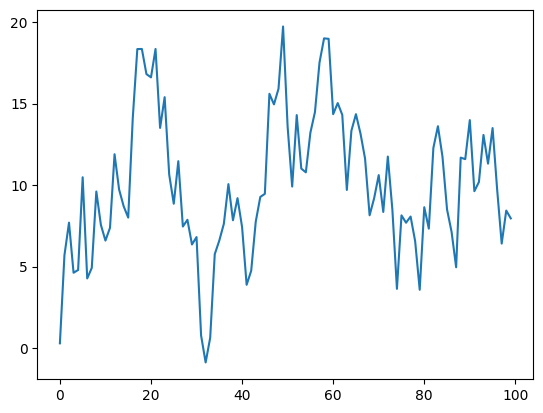

In [2]:
# reproducibility
np.random.seed(123)

# create autocorrelated data
time = np.arange(100)


ar1_sample = np.zeros(100)

# Set our first number to a random value with expected mean of 0 and standard deviation of 2.5
ar1_sample[0] =3 + np.random.normal(loc=0, scale=2.5, size=1)



#  0.7 * the last term plus a random error
for t in time[1:]:
    ar1_sample[t] = 3 + (0.7 * ar1_sample[t-1]) + np.random.normal(loc=0, scale=2.5, size=1)

plt.plot(time,ar1_sample)

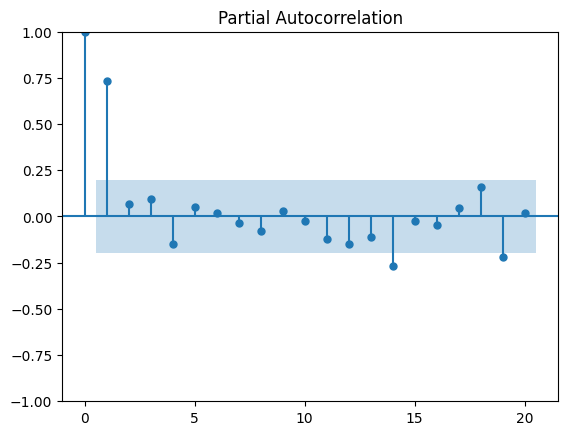

In [5]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(ar1_sample)
plt.show()

In [6]:
#pip install statsmodels --upgrade

In [7]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

In [8]:
ar1_model = AutoReg(ar1_sample, lags=1).fit()

In [9]:
print(ar1_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -243.019
Method:               Conditional MLE   S.D. of innovations              2.817
Date:                Thu, 08 Aug 2024   AIC                            492.037
Time:                        04:49:10   BIC                            499.823
Sample:                             1   HQIC                           495.187
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7723      0.711      3.901      0.000       1.379       4.165
y.L1           0.7322      0.065     11.302      0.000       0.605       0.859
                                    Roots           

In [10]:
pred1 = ar1_model.predict(start=0, end=len(ar1_sample), dynamic=False)

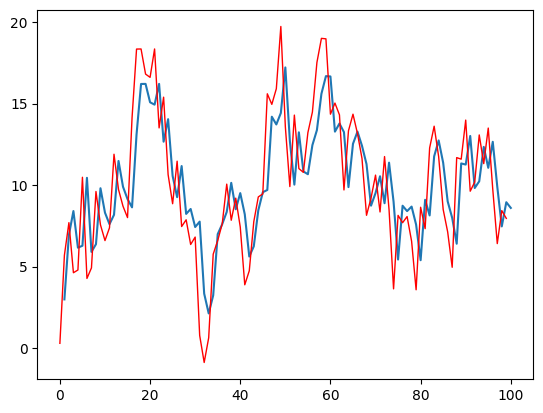

In [11]:
plt.plot(pred1)
plt.plot(ar1_sample, color='red', linewidth=1)

In [12]:
print('Coefficients: %s' % ar1_model.params)

Coefficients: [2.77225187 0.73216478]


# With 0 random error

<ipython-input-13-48861373ef44>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ar10_sample[0] =3+ np.random.normal(loc=0, scale=2.5, size=1)


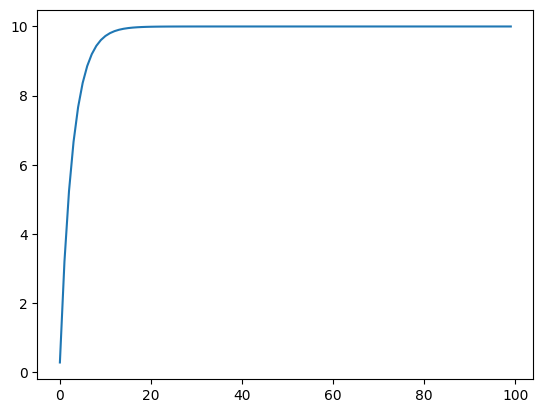

In [13]:
# reproducibility
np.random.seed(123)

# create autocorrelated data
time = np.arange(100)


ar10_sample = np.zeros(100)

# Set our first number to a random value with expected mean of 0 and standard deviation of 2.5
ar10_sample[0] =3+ np.random.normal(loc=0, scale=2.5, size=1)



#  0.7 * the last term plus a random error
for t in time[1:]:
    ar10_sample[t] = 3 + (0.7 * ar10_sample[t-1])# + np.random.normal(loc=0, scale=2.5, size=1)

plt.plot(time,ar10_sample)

In [14]:
ar10_model = AutoReg(ar10_sample, lags=1).fit()

In [15]:
print(ar10_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                3265.921
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Thu, 08 Aug 2024   AIC                          -6525.843
Time:                        04:49:30   BIC                          -6518.057
Sample:                             1   HQIC                         -6522.693
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0000   8.42e-16   3.56e+15      0.000       3.000       3.000
y.L1           0.7000   8.63e-17   8.11e+15      0.000       0.700       0.700
                                    Roots           

In [16]:
pred10 = ar10_model.predict(start=0, end=len(ar10_sample), dynamic=False)

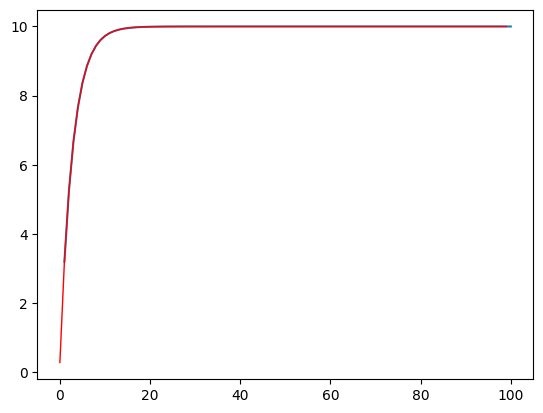

In [17]:
plt.plot(pred10)
plt.plot(ar10_sample, color='red', linewidth=1)

In [18]:
print('Coefficients: %s' % ar10_model.params)

Coefficients: [3.  0.7]


# **AR(2)**


# Yt = C + coefficien1 * Yt-1 + coefficient2 * Yt-2 + error

<ipython-input-19-edecc50f4b12>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ar2_sample[t] = 3+ (0.3 * ar2_sample[t-1]) + (0.5 * ar2_sample[t-2])+ np.random.normal(loc=0, scale=2.5, size=1)


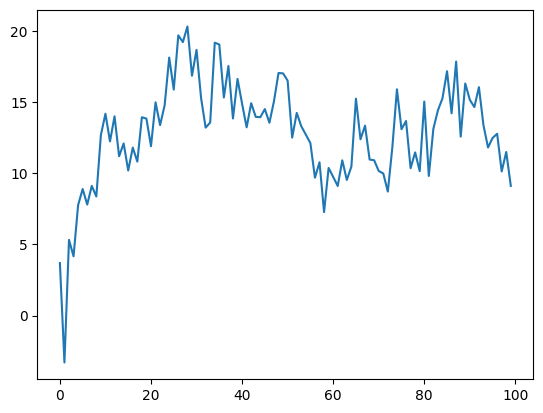

In [19]:
# create autocorrelated data
np.random.seed(112)


#
ar2_sample = np.zeros(100)



# Set first two values to random values with expected mean of 0 and standard deviation of 2.5
ar2_sample[0:2] =  np.random.normal(loc=0, scale=2.5, size=2)


# Set future values as 0.3 times the prior value and 0.3 times value two prior
for t in time[2:]:
    ar2_sample[t] = 3+ (0.3 * ar2_sample[t-1]) + (0.5 * ar2_sample[t-2])+ np.random.normal(loc=0, scale=2.5, size=1)

plt.plot(time,ar2_sample)

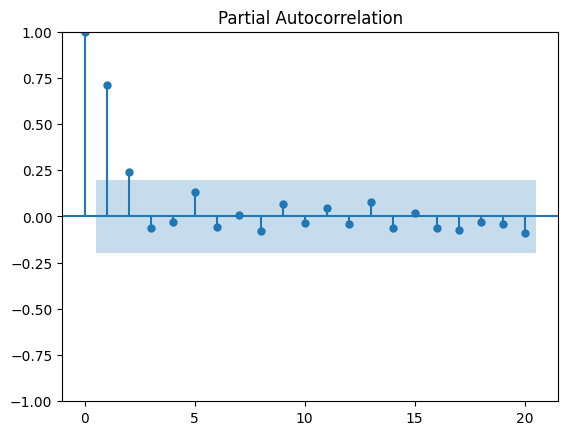

In [20]:
plot_pacf(ar2_sample)
plt.show()

In [21]:
ar2_model = AutoReg(ar2_sample, lags=2).fit()

In [22]:
print(ar2_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(2)   Log Likelihood                -205.735
Method:               Conditional MLE   S.D. of innovations              1.975
Date:                Thu, 08 Aug 2024   AIC                            419.471
Time:                        04:50:12   BIC                            429.811
Sample:                             2   HQIC                           423.653
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6102      0.795      4.539      0.000       2.051       5.169
y.L1           0.3605      0.084      4.309      0.000       0.197       0.524
y.L2           0.3732      0.081      4.610      0.0

In [23]:
pred2 = ar2_model.predict(start=0, end=len(ar2_sample), dynamic=False)

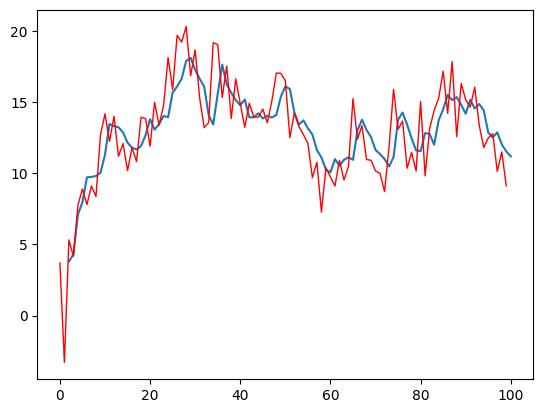

In [24]:
plt.plot(pred2)
plt.plot(ar2_sample, color='red', linewidth=1)

In [25]:
print('Coefficients: %s' % ar2_model.params)

Coefficients: [3.6102306  0.36050364 0.37324934]


# Step by Step AR Model

In [26]:
def AR(p,df):

  df_temp = df

  #Generating the lagged p terms
  for i in range(1,p+1):
    df_temp['Shifted_values_%d' % i ] = df_temp[0].shift(i)


  #Breaking data set into test and training
  df_data = pd.DataFrame(df_temp)

  df_data = df_data.dropna()
  #X contains the lagged values ,hence we skip the first column
  X_ = df_data.iloc[:,1:].values.reshape(-1,p)
  #Y contains the value,it is the first column
  y_ = df_data.iloc[:,0].values.reshape(-1,1)

  #Running linear regression to generate the coefficents of lagged terms
  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  lr.fit(X_,y_)

  theta  = lr.coef_.T
  intercept = lr.intercept_
  df_data['Predicted_Values'] = X_.dot(lr.coef_.T) + lr.intercept_
  # df_train_2[['Value','Predicted_Values']].plot()


  RMSE = np.sqrt(mean_squared_error(df_data[0], df_data['Predicted_Values']))

  print("The RMSE is :", RMSE,", Value of p : ",p)
  return [df_data,theta,intercept,RMSE]

In [27]:
import pandas as pd
from sklearn.metrics import mean_squared_error
df=pd.DataFrame(ar1_sample)
df_data,theta,intercept,RMSE=AR(1,df)

The RMSE is : 2.817344129561742 , Value of p :  1


In [28]:
theta

array([[0.73216478]])

In [29]:
intercept

array([2.77225187])